In [ ]:
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
print(train_data.shape)
print(test_data.shape)
print(test_targets)

57026/57026 [==============================] - 0s 0us/step
(404, 13)
(102, 13)
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7 12.  10.2 20.  18.5 20.9 23.  27.5 30.1
  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5 33.  28.4
 14.1 46.7 32.5 29.6 28.4 19.8 20.2 25.  35.4 20.3  9.7 14.5 34.9 26.6
  7.2 50.  32.4 21.6 29.8 13.1 27.5 21.2 23.1 21.9 13.  23.2  8.1  5.6
 21.7 29.6 19.6  7.  26.4 18.9 20.9 28.1 35.4 10.2 24.3 43.1 17.6 15.4
 16.2 27.1 21.4 21.5 22.4 25.  16.6 18.6 22.  42.8 35.1 21.5 36.  21.9
 24.1 50.  26.7 25. ]


In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [ ]:
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)

    model = build_model()
    net = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0, validation_data=(val_data, val_targets))
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)

    all_scores.append(val_mae)

print(np.mean(all_scores))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.4169247150421143


In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 50
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)

    model1 = build_model()
    net1 = model1.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0, validation_data=(val_data, val_targets))
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)

    all_scores.append(val_mae)

print(np.mean(all_scores))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
1.4520400911569595


In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 200
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)

    model2 = build_model()
    net2 = model2.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0, validation_data=(val_data, val_targets))
    val_mse, val_mae = model2.evaluate(val_data, val_targets, verbose=0)

    all_scores.append(val_mae)

print(np.mean(all_scores))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.5603490471839905


In [ ]:
print(net.history)

{'loss': [191.427978515625, 26.222047805786133, 19.474308013916016, 16.31239891052246, 14.474114418029785, 13.181894302368164, 12.224084854125977, 11.466851234436035, 11.190408706665039, 10.476652145385742, 10.07619571685791, 10.100162506103516, 9.204545974731445, 9.583213806152344, 9.431781768798828, 8.906501770019531, 8.947930335998535, 9.1810302734375, 8.692931175231934, 8.583456993103027, 8.258890151977539, 8.38728141784668, 8.208197593688965, 8.328843116760254, 7.948007106781006, 8.022578239440918, 7.798128604888916, 7.509317398071289, 7.538039207458496, 7.331969261169434, 7.912346363067627, 7.155065536499023, 7.429471492767334, 6.929107189178467, 7.028810024261475, 7.1556878089904785, 7.167984962463379, 6.773489952087402, 6.900666236877441, 7.073005199432373, 6.787234306335449, 6.736170768737793, 6.774758815765381, 6.303526878356934, 6.4472270011901855, 6.372244834899902, 6.331113815307617, 5.837686538696289, 6.034786701202393, 6.458264350891113, 6.107906341552734, 5.754360198974

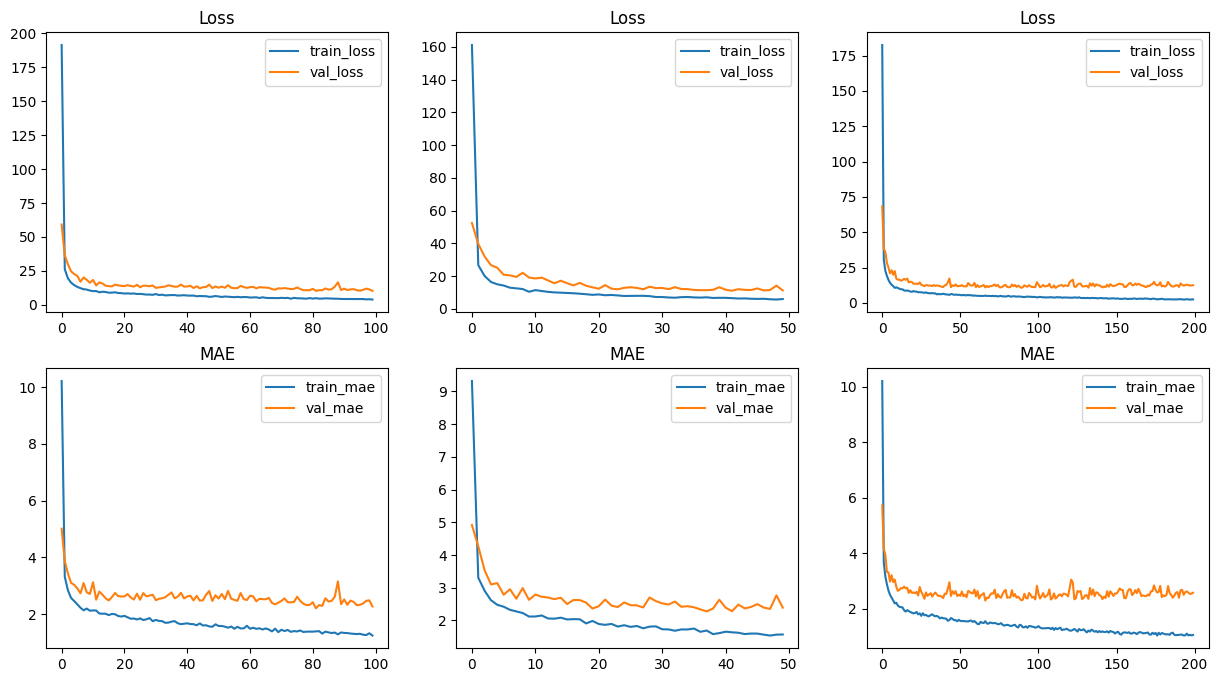

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
N = np.arange(0, len(net.history["loss"]))
plt.plot(N, net.history["loss"], label="train_loss")
plt.plot(N, net.history["val_loss"], label="val_loss")
plt.title("Loss")
plt.legend()

plt.subplot(2, 3, 2)
N = np.arange(0, len(net1.history["loss"]))
plt.plot(N, net1.history["loss"], label="train_loss")
plt.plot(N, net1.history["val_loss"], label="val_loss")
plt.title("Loss")
plt.legend()

plt.subplot(2, 3, 3)
N = np.arange(0, len(net2.history["loss"]))
plt.plot(N, net2.history["loss"], label="train_loss")
plt.plot(N, net2.history["val_loss"], label="val_loss")
plt.title("Loss")
plt.legend()


plt.subplot(2, 3, 4)
N = np.arange(0, len(net.history["mae"]))
plt.plot(N, net.history["mae"], label="train_mae")
plt.plot(N, net.history["val_mae"], label="val_mae")
plt.title("MAE")
plt.legend()

plt.subplot(2, 3, 5)
N = np.arange(0, len(net1.history["mae"]))
plt.plot(N, net1.history["mae"], label="train_mae")
plt.plot(N, net1.history["val_mae"], label="val_mae")
plt.title("MAE")
plt.legend()

plt.subplot(2, 3, 6)
N = np.arange(0, len(net2.history["mae"]))
plt.plot(N, net2.history["mae"], label="train_mae")
plt.plot(N, net2.history["val_mae"], label="val_mae")
plt.title("MAE")
plt.legend()


plt.show()

In [ ]:
k = 2
num_val_samples = len(train_data) // k
num_epochs = 80
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)

    model11 = build_model()
    net11 = model11.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0, validation_data=(val_data, val_targets))
    val_mse, val_mae = model11.evaluate(val_data, val_targets, verbose=0)

    all_scores.append(val_mae)

print(np.mean(all_scores))

processing fold # 0
processing fold # 1
2.545635938644409


In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 80
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)

    model12 = build_model()
    net12 = model12.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0, validation_data=(val_data, val_targets))
    val_mse, val_mae = model12.evaluate(val_data, val_targets, verbose=0)

    all_scores.append(val_mae)

print(np.mean(all_scores))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.4974250197410583


In [ ]:
k = 8
num_val_samples = len(train_data) // k
num_epochs = 80
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)

    model13 = build_model()
    net13 = model13.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0, validation_data=(val_data, val_targets))
    val_mse, val_mae = model13.evaluate(val_data, val_targets, verbose=0)

    all_scores.append(val_mae)

print(np.mean(all_scores))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
2.456505626440048


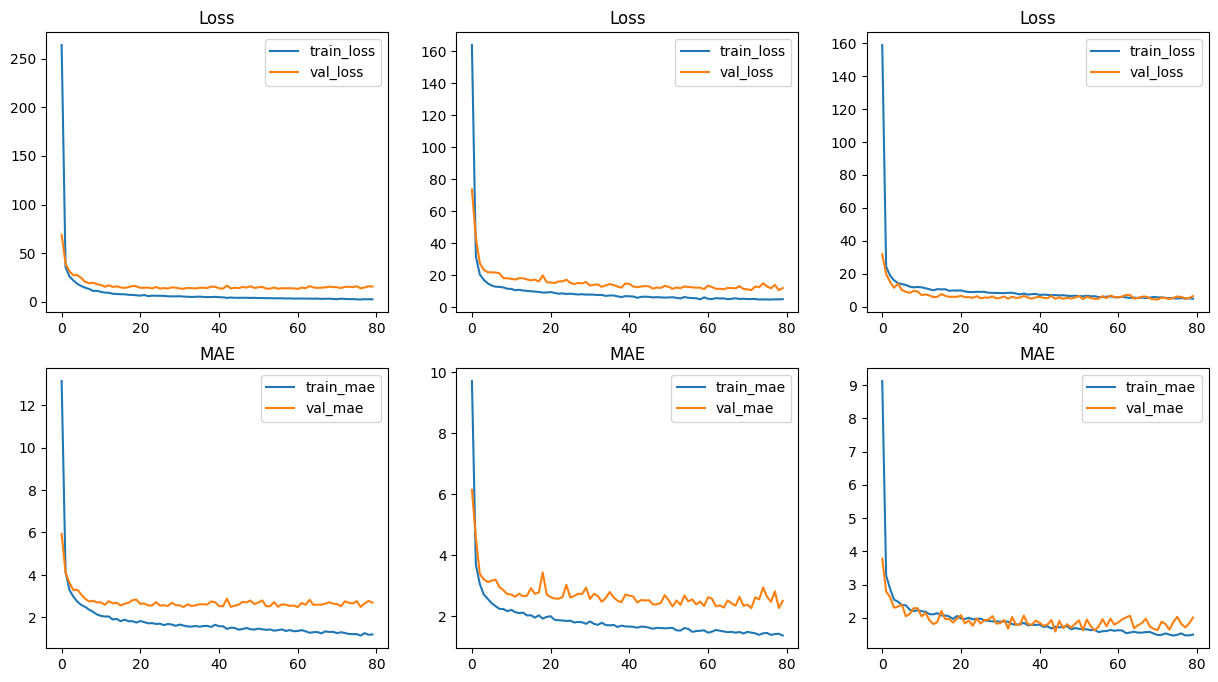

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
N = np.arange(0, len(net11.history["loss"]))
plt.plot(N, net11.history["loss"], label="train_loss")
plt.plot(N, net11.history["val_loss"], label="val_loss")
plt.title("Loss")
plt.legend()

plt.subplot(2, 3, 2)
N = np.arange(0, len(net12.history["loss"]))
plt.plot(N, net12.history["loss"], label="train_loss")
plt.plot(N, net12.history["val_loss"], label="val_loss")
plt.title("Loss")
plt.legend()

plt.subplot(2, 3, 3)
N = np.arange(0, len(net13.history["loss"]))
plt.plot(N, net13.history["loss"], label="train_loss")
plt.plot(N, net13.history["val_loss"], label="val_loss")
plt.title("Loss")
plt.legend()


plt.subplot(2, 3, 4)
N = np.arange(0, len(net11.history["mae"]))
plt.plot(N, net11.history["mae"], label="train_mae")
plt.plot(N, net11.history["val_mae"], label="val_mae")
plt.title("MAE")
plt.legend()

plt.subplot(2, 3, 5)
N = np.arange(0, len(net12.history["mae"]))
plt.plot(N, net12.history["mae"], label="train_mae")
plt.plot(N, net12.history["val_mae"], label="val_mae")
plt.title("MAE")
plt.legend()

plt.subplot(2, 3, 6)
N = np.arange(0, len(net13.history["mae"]))
plt.plot(N, net13.history["mae"], label="train_mae")
plt.plot(N, net13.history["val_mae"], label="val_mae")
plt.title("MAE")
plt.legend()


plt.show()